In [1]:
from google.colab import files
uploaded=files.upload()

Saving Walmart_sales.csv to Walmart_sales.csv


In [2]:
import pandas as pd

In [4]:
import io
df=pd.read_csv(io.BytesIO(uploaded['Walmart_sales.csv']))

In [5]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [8]:
df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


In [9]:
import matplotlib.pyplot as plt

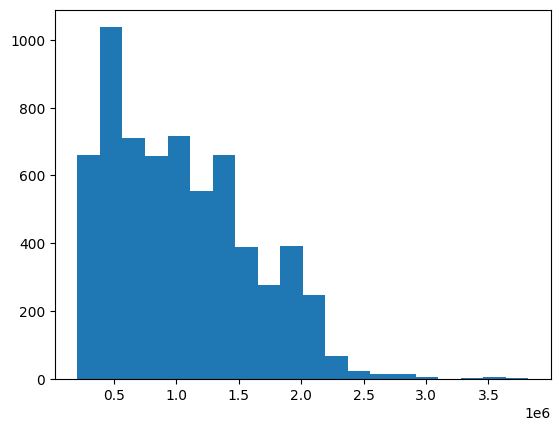

In [11]:
target_column=df["Weekly_Sales"]
plt.hist(target_column,bins=20)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

from sklearn.tree import plot_tree

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [13]:
# Function for data preprocessing
def preprocess_data(data, target_column):
    # Separating features and target variable
    X = data.drop(columns=[target_column])
    y = data[target_column]

    # Handling missing values
    numerical_cols = X.select_dtypes(include=['number']).columns
    categorical_cols = X.select_dtypes(include=['object']).columns
    numerical_transformer = SimpleImputer(strategy='mean')  # Impute missing values with mean
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
        ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical variables
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Preprocessing pipeline
    preprocess_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

    # Preprocessing training and testing data
    X_train_preprocessed = preprocess_pipeline.fit_transform(X_train)
    X_test_preprocessed = preprocess_pipeline.transform(X_test)

    return X_train_preprocessed, X_test_preprocessed, y_train, y_test


In [14]:
# Function for data preprocessing
def preprocess_data(data, target_column):
    # Separating features and target variable
    X = data.drop(columns=[target_column])
    y = data[target_column]
    print(X)
    print(y)
    # Handling missing values
    numerical_cols = X.select_dtypes(include=['number']).columns
    categorical_cols = X.select_dtypes(include=['object']).columns
    numerical_transformer = SimpleImputer(strategy='mean')  # Impute missing values with mean
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
        ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical variables
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Preprocessing pipeline
    preprocess_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

    # Preprocessing training and testing data
    X_train_preprocessed = preprocess_pipeline.fit_transform(X_train)
    X_test_preprocessed = preprocess_pipeline.transform(X_test)

    return X_train_preprocessed, X_test_preprocessed, y_train, y_test

In [15]:
preprocess_data(df,target_column="Weekly_Sales")

      Store        Date  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0         1  05-02-2010             0        42.31       2.572  211.096358   
1         1  12-02-2010             1        38.51       2.548  211.242170   
2         1  19-02-2010             0        39.93       2.514  211.289143   
3         1  26-02-2010             0        46.63       2.561  211.319643   
4         1  05-03-2010             0        46.50       2.625  211.350143   
...     ...         ...           ...          ...         ...         ...   
6430     45  28-09-2012             0        64.88       3.997  192.013558   
6431     45  05-10-2012             0        64.89       3.985  192.170412   
6432     45  12-10-2012             0        54.47       4.000  192.327265   
6433     45  19-10-2012             0        56.47       3.969  192.330854   
6434     45  26-10-2012             0        58.85       3.882  192.308899   

      Unemployment  
0            8.106  
1            8.106  


(<5148x149 sparse matrix of type '<class 'numpy.float64'>'
 	with 31234 stored elements in Compressed Sparse Row format>,
 <1287x149 sparse matrix of type '<class 'numpy.float64'>'
 	with 7826 stored elements in Compressed Sparse Row format>,
 1033     836707.85
 915      558963.83
 5903     588592.61
 2083     605413.17
 5943     526641.23
            ...    
 3772    1709365.19
 5191     508213.14
 5226     510787.46
 5390     342667.35
 860      506760.54
 Name: Weekly_Sales, Length: 5148, dtype: float64,
 2436    1138800.32
 3361    1304850.67
 233     1769296.25
 3667    1077640.13
 5011     428851.99
            ...    
 2600    1492060.89
 6308     801098.43
 6292     890689.51
 151     2066187.72
 2344     816138.33
 Name: Weekly_Sales, Length: 1287, dtype: float64)

In [16]:
def build_decision_tree(X_train, y_train, max_depth=None):
    classifier = DecisionTreeClassifier(max_depth=max_depth)
    classifier.fit(X_train, y_train)
    return classifier

In [17]:
X_train, X_test, y_train, y_test = preprocess_data(df,target_column="Weekly_Sales")

      Store        Date  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0         1  05-02-2010             0        42.31       2.572  211.096358   
1         1  12-02-2010             1        38.51       2.548  211.242170   
2         1  19-02-2010             0        39.93       2.514  211.289143   
3         1  26-02-2010             0        46.63       2.561  211.319643   
4         1  05-03-2010             0        46.50       2.625  211.350143   
...     ...         ...           ...          ...         ...         ...   
6430     45  28-09-2012             0        64.88       3.997  192.013558   
6431     45  05-10-2012             0        64.89       3.985  192.170412   
6432     45  12-10-2012             0        54.47       4.000  192.327265   
6433     45  19-10-2012             0        56.47       3.969  192.330854   
6434     45  26-10-2012             0        58.85       3.882  192.308899   

      Unemployment  
0            8.106  
1            8.106  


<ipython-input-26-7a48e8630f7f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix =df.corr()


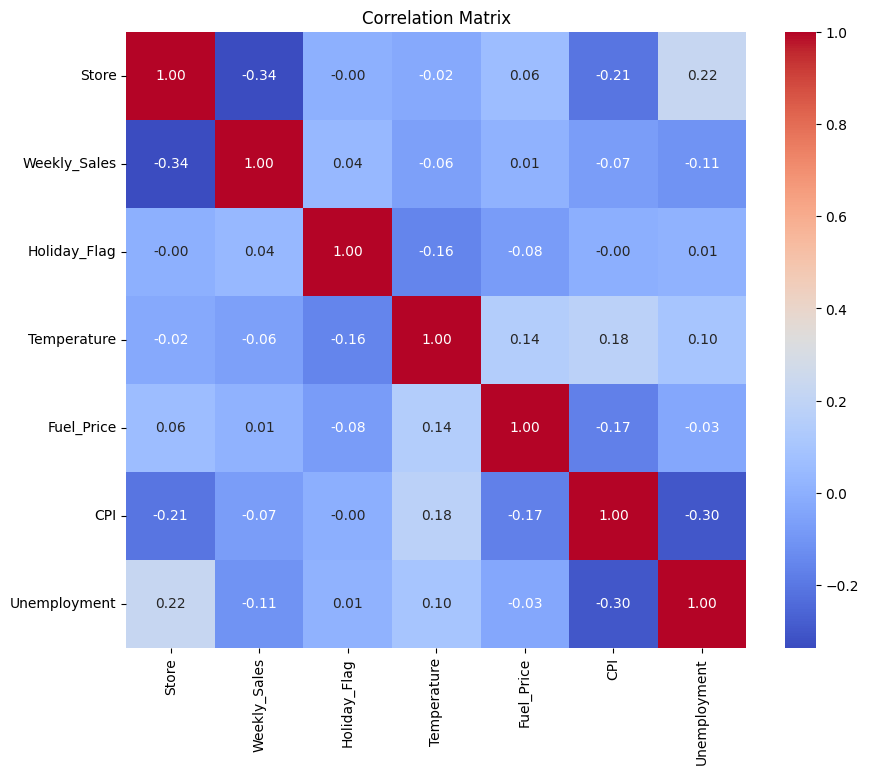

In [26]:


plt.figure(figsize=(10, 8))
corr_matrix =df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Assuming df is defined and preprocessed
df.dropna(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

X = df.drop(columns=['Weekly_Sales', 'Date'])
y = df['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

trees = DecisionTreeRegressor(random_state=0)

grid = GridSearchCV(estimator=trees, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

best_params = grid.best_params_
print("Best Parameters:", best_params)

# Evaluate the model with the best parameters
y_pred = grid.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

# Fit the best model using the best parameters
best_trees = DecisionTreeRegressor(**best_params)
best_trees.fit(X_train, y_train)


<ipython-input-27-29278f6366fb>:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


Best Parameters: {'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 10}
Root Mean Squared Error: 161335.57523911924


DecisionTreeRegressor(max_depth=9, min_samples_leaf=2, min_samples_split=10)

In [28]:

best_trees = DecisionTreeRegressor(**best_params)
best_trees.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=2, min_samples_split=10)

In [29]:

accuracy = best_trees.score(X_test, y_test)

print("Accuracy:", accuracy)

Accuracy: 0.9169997471849433
